In [3]:
import sys
sys.path.insert(0,'..')
sys.path.insert(0,'../..')

from bayes_opt import BayesOpt,BayesOpt_KnownOptimumValue,NormalBayesOpt_Known


import numpy as np
#from bayes_opt import auxiliary_functions
from bayes_opt import functions
from bayes_opt import utilities
import warnings
#from bayes_opt import acquisition_maximization

import sys

import itertools


import matplotlib.pyplot as plt

np.random.seed(6789)

warnings.filterwarnings("ignore")


counter = 0


myfunction_list=[]

#myfunction_list.append(functions.forrester())
myfunction_list.append(functions.branin())
#myfunction_list.append(functions.goldstein())
#myfunction_list.append(functions.hartman_3d())
#myfunction_list.append(functions.ackley(input_dim=5))
#myfunction_list.append(functions.alpine1(input_dim=5))
# myfunction_list.append(functions.hartman_6d())
#myfunction_list.append(functions.gSobol(a=np.array([1,1,1,1,1])))
#myfunction_list.append(functions.gSobol(a=np.array([1,1,1,1,1,1,1,1,1,1])))


acq_type_list=[]


# temp={}
# temp['name']='find0' # confidence bound minimization
# temp['IsTGP']=1 # recommended to use tgp for CBM
# acq_type_list.append(temp)

temp={}
temp['name']='MC_ei' # confidence bound minimization
temp['IsTGP']=1 # recommended to use tgp for CBM
acq_type_list.append(temp)

# temp={}
# temp['name']='truncated_mean_ei' # vanilla EI
# temp['IsTGP']=0 # we can try 'tgp' by setting it =1
# acq_type_list.append(temp)

# temp={}
# temp['name']='findfmax' # vanilla EI
# temp['IsTGP']=0 # we can try 'tgp' by setting it =1
# acq_type_list.append(temp)


# temp={}
# temp['name']='erm' # expected regret minimization
# temp['IsTGP']=0 # recommended to use tgp for ERM
# acq_type_list.append(temp)




# temp={}
# temp['name']='ei' # vanilla EI
# temp['IsTGP']=0 # we can try 'tgp' by setting it =1
# acq_type_list.append(temp)


# temp={}
# temp['name']='truncated_ei' # vanilla EI
# temp['IsTGP']=0 # we can try 'tgp' by setting it =1
# acq_type_list.append(temp)






fig=plt.figure()

color_list=['r','b','k','m','c','g','o']
marker_list=['s','x','o','v','^','>','<']

for idx, (myfunction,acq_type,) in enumerate(itertools.product(myfunction_list,acq_type_list)):

    print("=====================func:",myfunction.name)
    print("==================acquisition type",acq_type)
    
    IsTGP=acq_type['IsTGP']
    acq_name=acq_type['name']
    
    nRepeat=20
    
    ybest=[0]*nRepeat
    MyTime=[0]*nRepeat
    MyOptTime=[0]*nRepeat
    marker=[0]*nRepeat

    bo=[0]*nRepeat
   
    [0]*nRepeat
    
    for ii in range(nRepeat):
        
        if 'kov' in acq_name or acq_name == 'erm' or acq_name == 'cbm' or acq_name == 'find0' or acq_name =='MC_ei' :
            bo[ii]=BayesOpt_KnownOptimumValue(myfunction.func,myfunction.bounds,myfunction.fstar, \
                                  acq_name,IsTGP,verbose=1)
            
        elif acq_name == 'truncated_mean_ei' or acq_name == "findfmax" or acq_name == "truncated_ei":
            bo[ii]=NormalBayesOpt_Known(myfunction.func,myfunction.bounds,myfunction.fstar, acq_name,verbose=1)
            
        else:
            bo[ii]=BayesOpt(myfunction.func,myfunction.bounds,acq_name,verbose=1)
  
  
  
        if acq_name =='random': # we generate random points without running BO
            ybest[ii],MyTime[ii]=utilities.run_experiment(bo[ii],
                 n_init=3*myfunction.input_dim,NN=0,runid=ii)  
        elif acq_name =='erm' or  acq_name =='find0' or acq_name =='MC_ei': 
             ybest[ii],MyTime[ii]=utilities.run_experiment_2(bo[ii],n_init=3*myfunction.input_dim,\
             NN=10*myfunction.input_dim,runid=ii)   
        else:
            ybest[ii],MyTime[ii]=utilities.run_experiment(bo[ii],n_init=3*myfunction.input_dim,\
             NN=10*myfunction.input_dim,runid=ii)   
                                       
        MyOptTime[ii]=bo[ii].time_opt
        print("ii={} BFV={:.3f}".format(ii,myfunction.ismax*np.max(ybest[ii])))                                              
        

    Score={}
    Score["ybest"]=ybest
    Score["MyTime"]=MyTime
    Score["MyOptTime"]=MyOptTime
    
    utilities.print_result_sequential(bo,myfunction,Score,acq_type) 
    
    
    ## plot the result
    # process the result
    
    y_best_sofar=[0]*len(bo)
    for uu,mybo in enumerate(bo):
        y_best_sofar[uu]=[ (myfunction.fstar - np.max(mybo.Y_ori[:ii+1]) ) for ii in range(len(mybo.Y_ori))]
        y_best_sofar[uu]=y_best_sofar[uu][3*myfunction.input_dim:] # remove the random phase for plotting purpose
        
    y_best_sofar=np.asarray(y_best_sofar)
    
    myxaxis=range(y_best_sofar.shape[1])
    
    np.savetxt(acq_name+'+'+ ''+str(myfunction.name)+'.csv', y_best_sofar, delimiter=',')
    
    plt.errorbar(myxaxis,np.mean(y_best_sofar,axis=0), np.std(y_best_sofar,axis=0)/np.sqrt(nRepeat),
                label=acq_type['name'],color=color_list[idx],marker=marker_list[idx])
    
    
    
plt.ylabel("Simple Regret",fontsize=14)
plt.xlabel("Iterations",fontsize=14)
plt.legend(prop={'size': 14})
strTitle="{:s} D={:d}".format(myfunction.name,myfunction.input_dim)
plt.title(strTitle,fontsize=18)
plt.show()

=====================func: branin
==================acquisition type {'name': 'MC_ei', 'IsTGP': 1}
estimated lengthscale [0.001]
EI
EI
EI
EI
EI
EI
estimated lengthscale [0.08571578]
EI


ValueError: too many axes: 2 (effrank=2), expected rank=1


<Figure size 640x480 with 0 Axes>

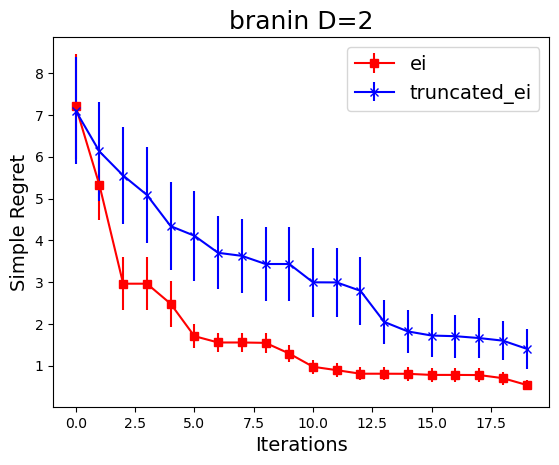

In [2]:
import sys
sys.path.insert(0,'..')
sys.path.insert(0,'../..')

from bayes_opt import BayesOpt,BayesOpt_KnownOptimumValue,NormalBayesOpt_Known


import numpy as np
#from bayes_opt import auxiliary_functions
from bayes_opt import functions
from bayes_opt import utilities
import warnings
#from bayes_opt import acquisition_maximization

import sys

import itertools


import matplotlib.pyplot as plt

np.random.seed(6789)

warnings.filterwarnings("ignore")


counter = 0

myfunction_list=[]

#myfunction_list.append(functions.sincos())
myfunction_list.append(functions.branin())
# myfunction_list.append(functions.hartman_3d())
#myfunction_list.append(functions.ackley(input_dim=5))
#myfunction_list.append(functions.alpine1(input_dim=5))
# myfunction_list.append(functions.hartman_6d())
# myfunction_list.append(functions.gSobol(a=np.array([1,1,1,1,1])))
#myfunction_list.append(functions.gSobol(a=np.array([1,1,1,1,1,1,1,1,1,1])))



acq_type_list=[]

# temp={}
# temp['name']='find0' # confidence bound minimization
# temp['IsTGP']=1 # recommended to use tgp for CBM
# acq_type_list.append(temp)


# temp={}
# temp['name']='erm' # expected regret minimization
# temp['IsTGP']=0 # recommended to use tgp for ERM
# acq_type_list.append(temp)



temp={}
temp['name']='ei' # vanilla EI
temp['IsTGP']=0 # we can try 'tgp' by setting it =1
acq_type_list.append(temp)

# temp={}
# temp['name']='MC_ei' # confidence bound minimization
# temp['IsTGP']=1 # recommended to use tgp for CBM
# acq_type_list.append(temp)

# temp={}
# temp['name']='truncated_mean_ei' # vanilla EI
# temp['IsTGP']=0 # we can try 'tgp' by setting it =1
# acq_type_list.append(temp)

# temp={}
# temp['name']='findfmax' # vanilla EI
# temp['IsTGP']=0 # we can try 'tgp' by setting it =1
# acq_type_list.append(temp)

temp={}
temp['name']='truncated_ei' # vanilla EI
temp['IsTGP']=0 # we can try 'tgp' by setting it =1
acq_type_list.append(temp)


fig=plt.figure()

color_list=['r','b','k','m','c','g','orange']
marker_list=['s','x','o','v','^','>','<']


for idx, (myfunction,acq_type,) in enumerate(itertools.product(myfunction_list,acq_type_list)):
    
    method_number = len(acq_type_list)
    nRepeat = 20
    y_best_sofar = np.genfromtxt(os.path.join(os.getcwd(),str(acq_type['name'])+'+'+str(myfunction.name)+'.csv'), delimiter=',')
    myxaxis=range(y_best_sofar.shape[1])
    
    if myfunction.name == 'branin' or myfunction.name == 'hartman_3d' or myfunction.name == 'alpine1':
        plt.errorbar(myxaxis,np.mean(y_best_sofar,axis=0),np.std(y_best_sofar,axis=0)/np.sqrt(nRepeat),label=acq_type['name'],color=color_list[idx%method_number],marker=marker_list[idx%4])
       
        if (idx+1)%method_number == 0:
            plt.ylabel("Simple Regret",fontsize=14)
            plt.xlabel("Iterations",fontsize=14)
            plt.legend(prop={'size': 14})
            strTitle="{:s} D={:d}".format(myfunction.name,myfunction.input_dim)
            plt.title(strTitle,fontsize=18)
            plt.show()
            
    else:
        plt.errorbar(myxaxis,np.mean(np.log(y_best_sofar),axis=0),np.std(np.log(y_best_sofar),axis=0)/np.sqrt(nRepeat),label=acq_type['name'],color=color_list[idx%method_number],marker=marker_list[idx%4])
        
        if (idx+1)%method_number == 0:
            plt.ylabel("Log Regret",fontsize=14)
            plt.xlabel("Iterations",fontsize=14)
            plt.legend(prop={'size': 14})
            strTitle="{:s} D={:d}".format(myfunction.name,myfunction.input_dim)
            plt.title(strTitle,fontsize=18)
            plt.show()

In [23]:
y_best_sofar.shape

(10, 135)

In [5]:
np.mean(y_best_sofar,axis=0)

array([1.45538059, 1.19682515, 1.19682515, 0.44412167, 0.31704184,
       0.31704184, 0.08861746, 0.08861746, 0.08861746, 0.08861746,
       0.08861746, 0.08861746, 0.08861746, 0.08861746, 0.08861746,
       0.08861746, 0.08861746, 0.08861746, 0.08861746, 0.08861746,
       0.08861746, 0.08861746, 0.08861746, 0.08861746, 0.08861746,
       0.08861746, 0.08861746, 0.08861746, 0.08861746, 0.00270759])

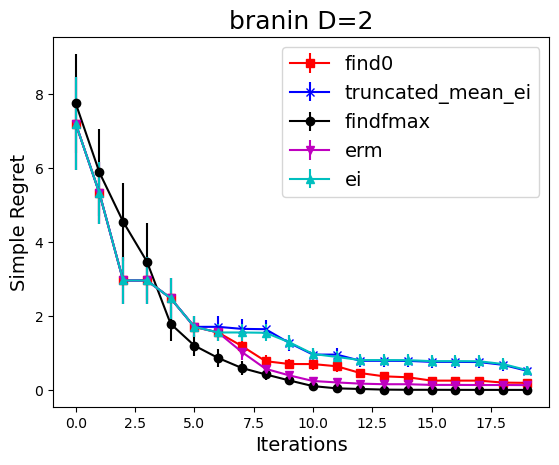

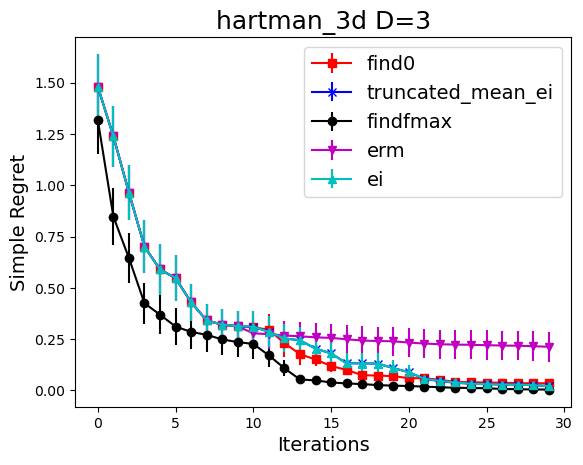

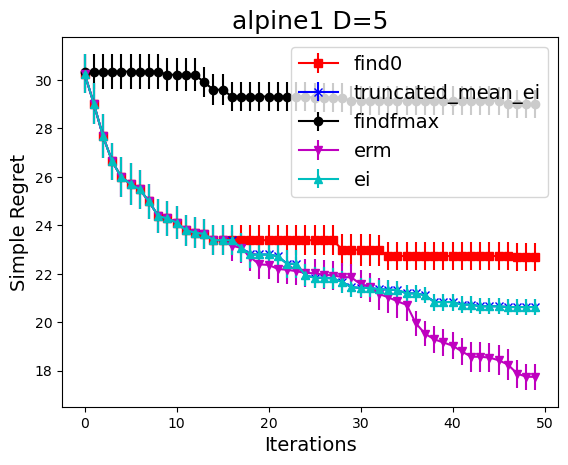

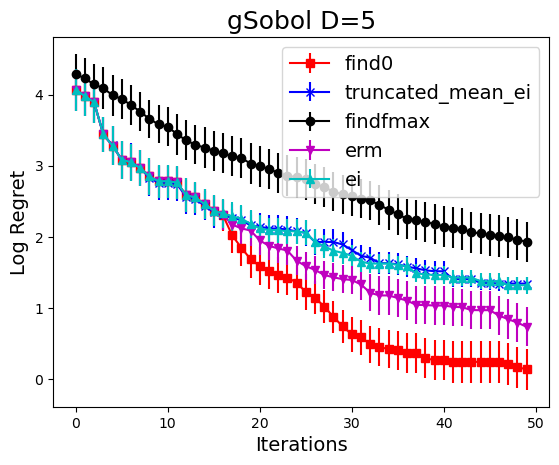

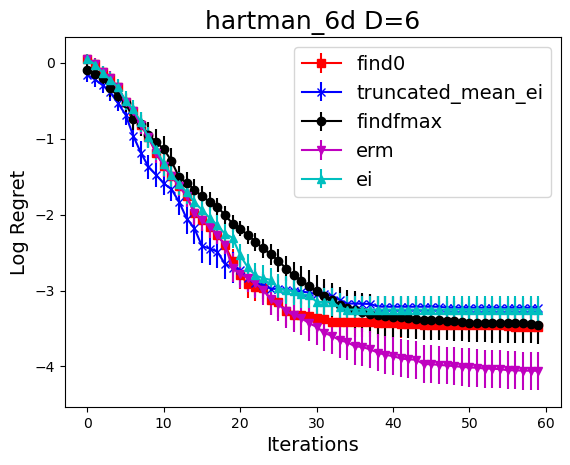

In [8]:
import sys
sys.path.insert(0,'..')
sys.path.insert(0,'../..')

from bayes_opt import BayesOpt,BayesOpt_KnownOptimumValue,NormalBayesOpt_Known


import numpy as np
#from bayes_opt import auxiliary_functions
from bayes_opt import functions
from bayes_opt import utilities
import warnings
#from bayes_opt import acquisition_maximization

import sys

import itertools

import os
import matplotlib.pyplot as plt


np.random.seed(6789)

warnings.filterwarnings("ignore")


myfunction_list=[]

# myfunction_list.append(functions.sincos())
myfunction_list.append(functions.branin()) #good
myfunction_list.append(functions.hartman_3d()) #good
myfunction_list.append(functions.alpine1(input_dim=5)) #bad
#myfunction_list.append(functions.ackley(input_dim=5)) #bad
myfunction_list.append(functions.gSobol(a=np.array([1,1,1,1,1]))) #good
myfunction_list.append(functions.hartman_6d()) #good
# myfunction_list.append(functions.gSobol(a=np.array([1,1,1,1,1,1,1,1,1,1])))


acq_type_list=[]

temp={}
temp['name']='find0' # confidence bound minimization
temp['IsTGP']=1 # recommended to use tgp for CBM
acq_type_list.append(temp)


temp={}
temp['name']='truncated_mean_ei' # vanilla EI
temp['IsTGP']=0 # we can try 'tgp' by setting it =1
acq_type_list.append(temp)

temp={}
temp['name']='findfmax' # vanilla EI
temp['IsTGP']=0 # we can try 'tgp' by setting it =1
acq_type_list.append(temp)


temp={}
temp['name']='erm' # expected regret minimization
temp['IsTGP']=0 # recommended to use tgp for ERM
acq_type_list.append(temp)




temp={}
temp['name']='ei' # vanilla EI
temp['IsTGP']=0 # we can try 'tgp' by setting it =1
acq_type_list.append(temp)



fig=plt.figure()

color_list=['r','b','k','m','c','g','orange']
marker_list=['s','x','o','v','^','>','<']


for idx, (myfunction,acq_type,) in enumerate(itertools.product(myfunction_list,acq_type_list)):
    
    method_number = len(acq_type_list)
    nRepeat = 20
    y_best_sofar = np.genfromtxt(os.path.join(os.getcwd(),'N=20(0.3)/'+str(acq_type['name'])+'+'+str(myfunction.name)+'.csv'), delimiter=',')
    myxaxis=range(y_best_sofar.shape[1])
    
    if myfunction.name == 'branin' or myfunction.name == 'hartman_3d' or myfunction.name == 'alpine1':
        
        plt.errorbar(myxaxis,np.mean(y_best_sofar,axis=0),np.std(y_best_sofar,axis=0)/np.sqrt(nRepeat),label=acq_type['name'],color=color_list[idx%method_number],marker=marker_list[idx%method_number])
        
        if (idx+1)%method_number == 0:
            plt.ylabel("Simple Regret",fontsize=14)
            plt.xlabel("Iterations",fontsize=14)
            plt.legend(prop={'size': 14})
            strTitle="{:s} D={:d}".format(myfunction.name,myfunction.input_dim)
            plt.title(strTitle,fontsize=18)
            plt.show()
            
    else:
        plt.errorbar(myxaxis,np.mean(np.log(y_best_sofar),axis=0),np.std(np.log(y_best_sofar),axis=0)/np.sqrt(nRepeat),label=acq_type['name'],color=color_list[idx%method_number],marker=marker_list[idx%method_number])
        
        if (idx+1)%method_number == 0:
            plt.ylabel("Log Regret",fontsize=14)
            plt.xlabel("Iterations",fontsize=14)
            plt.legend(prop={'size': 14})
            strTitle="{:s} D={:d}".format(myfunction.name,myfunction.input_dim)
            plt.title(strTitle,fontsize=18)
            plt.show()